In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from constrained_model import integrate, get_K0
from constrained_model import data_generator
from constrained_model import posterior

# TESTING THE FUNCTIONAL ACTUAL BETA

In [2]:
n = 100
sigma = 1

def covariates_kernel(s,t):
    return np.exp(-2*(t-s)**2)
def prior_kernel(s,t):
    return np.exp(-(t-s)**2)

a = -3
b = 3
g = 40

T = np.linspace(a,b,g)
T0 = T[np.where((T<0.5)&(T>-1))]

def prior_kernel(s,t):
    return np.exp(-2*((t-s)**2))

K = np.fromfunction(np.vectorize(lambda s, t: prior_kernel(T[s], T[t])), (g, g), dtype=int)


In [3]:
# testing input

beta1 = 0.5*T
beta2 = np.sin((np.pi/4)*T)
beta3 = np.sin((2*np.pi)*T)
beta4 = np.exp(T)

In [4]:
#generation

betas = [beta1, beta2, beta3, beta4]
data = {}

for i in range(len(betas)):
    idx = str(i+1)
    data[idx] = data_generator(T, betas[i],n,covariates_kernel, sigma).i_o()

In [5]:
#fitted value

p = {}

for i in data.keys():
    x ,y = data[i]
    p[i] = posterior(T,T0,x,y,K,sigma).fitted_values()

Text(0.5, 0.98, 'Smoother Betas = Better Fit')

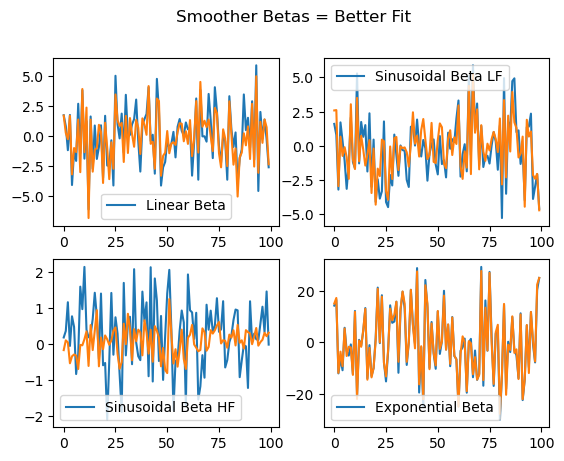

In [6]:
#actual vs fitted

fig,axs = plt.subplots(2,2)
axs[0,0].plot(data['1'][1],label='Linear Beta')
axs[0,0].plot(p['1'])
axs[0,1].plot(data['2'][1],label='Sinusoidal Beta LF')
axs[0,1].plot(p['2'])
axs[1,0].plot(data['3'][1],label='Sinusoidal Beta HF')
axs[1,0].plot(p['3'])
axs[1,1].plot(data['4'][1],label='Exponential Beta')
axs[1,1].plot(p['4'])

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

fig.suptitle('Smoother Betas = Better Fit')

# TESTING THE PRIOR KERNEL

In [7]:
# fixed input

a = -3
b = 3
g = 40
T = np.linspace(a,b,g)
sigma = 1
beta = np.sin((np.pi/4)*T)
n = 100

def covariates_kernel(s,t):
    return np.exp(-2*(t-s)**2)

x,y = data_generator(T,beta,n,covariates_kernel, sigma).i_o()

In [8]:
# testing input

def gaussian1(s,t):
    return np.exp(-(t-s)**2)
def gaussian2(s,t):
    return np.exp(-((t-s)/2)**2)
def WN(s,t):
    return s==t
def poly(s,t):
    return s*t+1

kernels = [gaussian1, gaussian2, WN, poly]

In [9]:
#fitted value

p = {}

for i in range(len(kernels)):
    idx = str(i+1)
    K = np.fromfunction(np.vectorize(lambda s, t: kernels[i](T[s], T[t])), (g, g), dtype=int)
    p[idx] = posterior(T,T0, x,y,K,sigma).fitted_values()

Text(0.5, 0.98, 'Those Kernels are NOT Equivalent...')

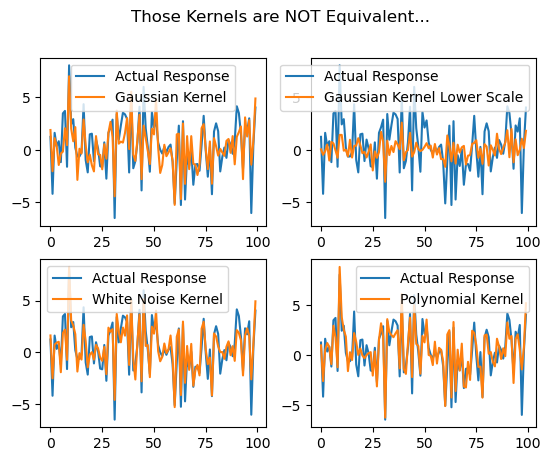

In [12]:
#actual vs fitted

fig,axs = plt.subplots(2,2)
axs[0,0].plot(y,label='Actual Response')
axs[0,0].plot(p['1'],label='Gaussian Kernel')
axs[0,1].plot(y,label='Actual Response')
axs[0,1].plot(p['2'],label='Gaussian Kernel Lower Scale')
axs[1,0].plot(y,label='Actual Response')
axs[1,0].plot(p['3'],label='White Noise Kernel')
axs[1,1].plot(y,label='Actual Response')
axs[1,1].plot(p['4'],label='Polynomial Kernel')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

fig.suptitle('Those Kernels are NOT Equivalent...')